### UR Bootcamp Team Project:  Diana, Marie, Irene
### Homework #7: Using APIs, statisics and mapping to conduct regional economic data analyses

## *Analysis of Richmond Metro Businesses and Associated Economics by Zip Code area*

###  Problem Statement:

In this study, we are interested in what major employers are in the metro Richmond area, where they are located
as indicated by zip code and whether there are associations with adjoining poverty, salary rates, and home values.

In addition, we consider the overall types of employers in the Greater Richmond, as an indicator for those likely 
to hire data analysts or IT professionals.  We also compare the connection to the "2018 Best Places to Work" 
as determined from the Richmond Times Digest annual survey to the largest private employers in the region.


### Initial Research Questions:

*  What is the economic "backdrop" for economic development in the Richmond area, based on demographics?
   Where are the highs/lows?
*  What businesses form the economic basis of the Richmond Area?
*  Are there clear relationships between the presence of businesses and the demographics of surrounding areas?
*  Where might there be opportunities for business development?
*  Which business lines are likely to require data analysts and IT professionals?
*  Is there a connection between the largest employers and best places to work?


### Government Data used in the analysis
    
<img src="./Resources/Logos/Census_logo.png"
	title="Census" width="150" height="100" align = "right" />

The United States Census Bureau API was accessed to obtain and map demographic data 
by Zip Codes for Richmond and 13 surrounding counties:
    
    * poverty rate
    * unemployment rate
    * median income
    * median home values


### Public Data used in the analysis
    
<img src="./Resources/Logos/BestPlacestoWork.jpg"
	title="Places" width="150" height="100" align = "right" />

The Richmond Times Digest conducts a "Best Places to Work in Richmond" annual survey that solicits inputs
from small, mid-size, large, and mega-large companies in the region.  The survey received responses from 
about 17,760 employees on numerous topics affecting workplace life, from their views 
on leadership, managers, pay and benefits to training and work-life balance. It also looked at other factors 
including how employers encourage community involvement and how businesses promote diversity.  

Sixty-five businesses were recognized as "Best Places to Work in 2018" and provided in an online Excel file.



### Private Data used in the analysis
    
<img src="./Resources/Logos/GRP_Logo.png"
	title="GRP" width="150" height="100" align = "right" />

### About the Greater Richmond Partnership

The Greater Richmond Partnership, Inc. (GRP) is the lead regional economic development organization for the City of Richmond
and the counties of Chesterfield, Hanover and Henrico in Virginia. GRP impacts the Richmond Region by recruiting companies 
from all over the globe, which provide employment opportunities and taxable capital investment for our local community.

Much of the specific business data that is needed to understand both business interests and patterns of development are not
publically available without paying for data access.  As a proactive measure, our team reached out to the VP of Business Development
and Research at the GRP, described our involvement in the UR Bootcamp class, and requested the opportunity to work with
some of the GRP data sets as a means to learn data analytics techniques as well as economic development in Richmond. 

The GRP provided several data sets describing businesses in the Richmond area, including a compilation of all businesses
with more than 5 employees by "Main Line of Business".

> ##  Analysis Results for the Master list distributions
>
> ### ** Major business categories from Master List**
>  There are 23600 businesses in the Master MSA file, of which restaurants are by far the single largest
>  type of business.  Small business dominate the business distribution showing the importance of this
>  scale of business to the local economic landscape.
> 
> ### ** 

In [17]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import gmaps
from scipy import stats
import pandas as pd
import numpy as np
import requests
import time
import json
from time import gmtime, strftime 

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')



In [18]:
# Read the Metro area business data from the csv Master file.
business_data_to_load = "./Resources/Master_Employers_nohdr.csv"
#print(business_data_to_load)

# Not every CSV requires an encoding, but be aware this can come up
business_data = pd.read_csv(business_data_to_load, encoding="ISO-8859-1")
business_data_df = pd.DataFrame(business_data)
#business_data.head()

main_biz = business_data_df["Main Line of Business"].dropna()
print(len(main_biz))
numbiz = len(main_biz)
#main_biz.head()
counts = pd.DataFrame(main_biz.value_counts()).rename({"Nonclassified Establishments": "Consulting & LLCs"})
counts.head()

23600


,Main Line of Business
Restaurants,1851
Consulting & LLCs,883
Residential Building Construction,629
Physicians & Surgeons,609
Churches,559


In [20]:
comp_gt_1 = counts[counts["Main Line of Business"] > 1]
comp_gt_1.head(10)


,Main Line of Business
Restaurants,1851
Consulting & LLCs,883
Residential Building Construction,629
Physicians & Surgeons,609
Churches,559
Beauty Salons,481
Elementary & Secondary Schools,369
"Insurance Agents, Brokers, & Service",366
Convenience Stores,315
Real Estate Agents & Managers,311


In [21]:
comp_gt_1.tail(10)

,Main Line of Business
International Affairs Government Offices,2
Promoters of Shows & Exhibitions,2
International Consultants,2
Hospital Equipment & Supplies Wholesale,2
Professional Equipment & Supplies Wholesale,2
Cognitive Disability Development Services,2
Nurses Schools,2
Beddings & Linens Stores,2
Bed & Breakfast Accommodations,2
Software Development Studios,2


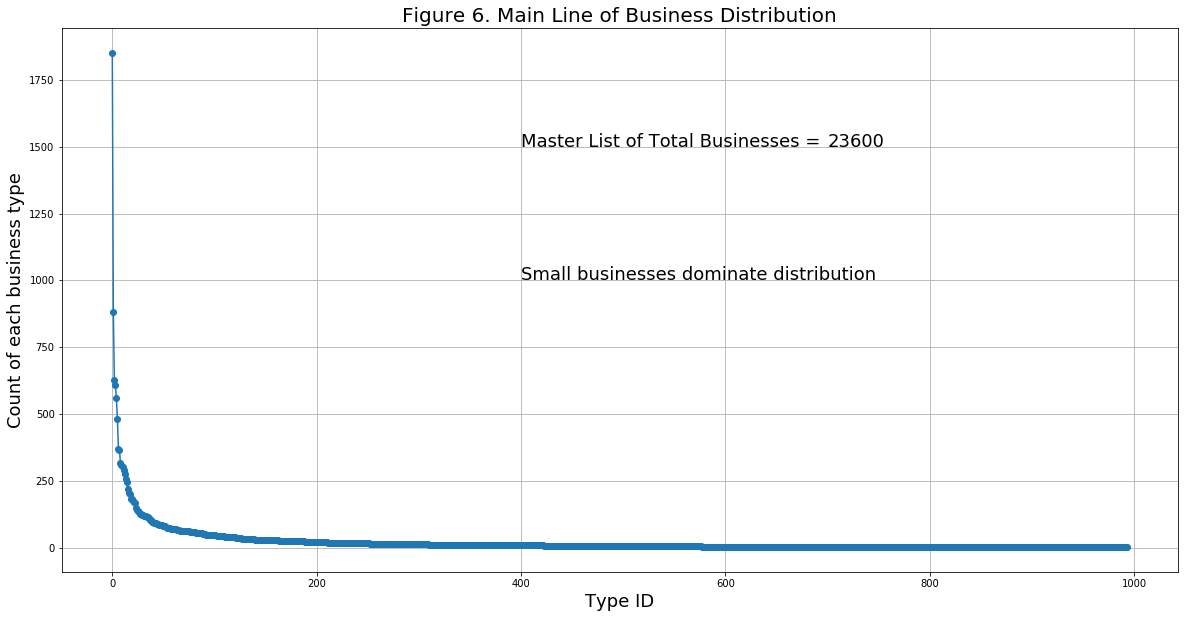

In [22]:
# Plot businesses as a distribution

plt.figure(figsize=(20,10))
plt.title('Figure 6. Main Line of Business Distribution', fontsize=20)
plt.xlabel('Type ID', fontsize=18)
plt.ylabel('Count of each business type', fontsize=18)
plt.grid()
# Set x axis and tick locations
x_axis = np.arange(len(comp_gt_1))
plt.text(400, 1500,"Master List of Total Businesses = ", fontsize=18)
plt.text(700,1500, str(numbiz), fontsize=18)
plt.text(400, 1000,"Small businesses dominate distribution ", fontsize=18)
# Tells matplotlib that we want to make a scatter plot
# The size of each point on our plot is determined by their x value
#plt.scatter(x_axis, comp_gt_1, marker="o", facecolors="red", edgecolors="black")
plt.plot(x_axis, comp_gt_1, marker="o")
plt.savefig("./Resources/PNGs_of_Figures/All_business_distro.png")
plt.show()

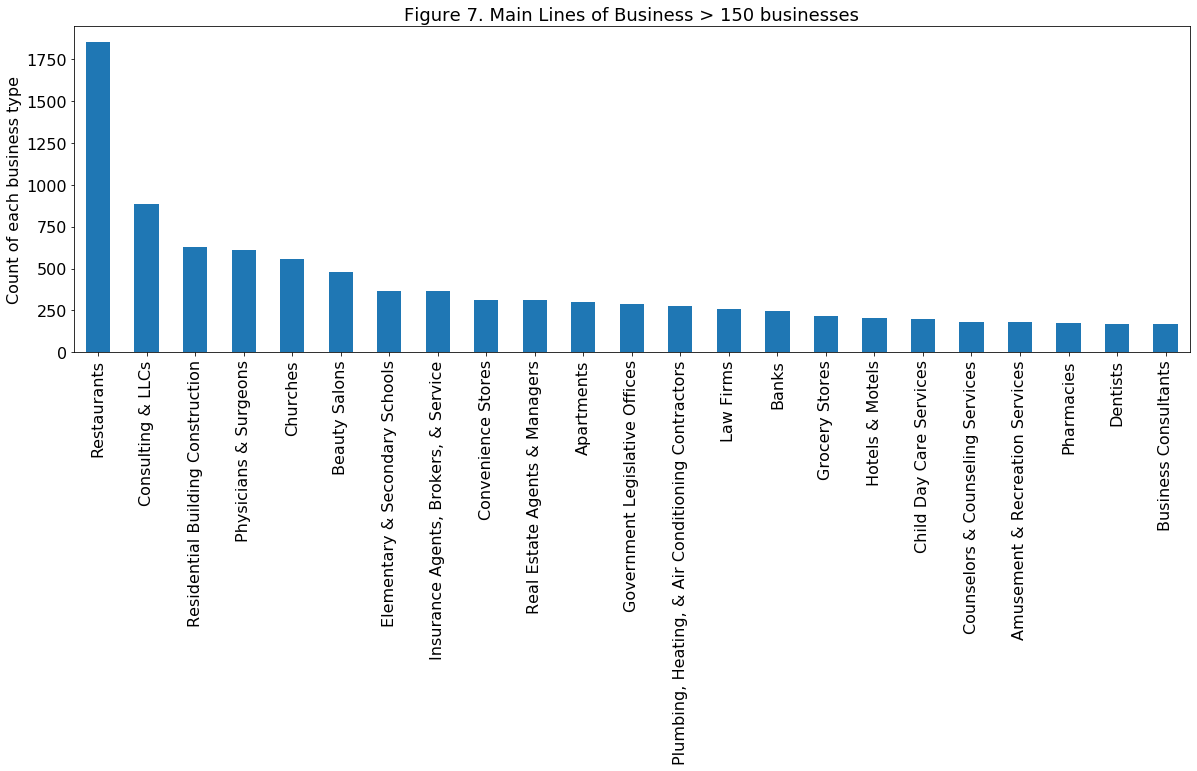

In [23]:
comp_gt_150 = counts[counts["Main Line of Business"] > 150]
comp_gt_150.head(10)
plt.figure(figsize=(20,10))

plt.title('Figure 7. Main Lines of Business > 150 businesses', fontsize=18)
x_axis = comp_gt_150.index
#plt.xlabel(x_axis, fontsize=8)
plt.ylabel('Count of each business type', fontsize=16)
plt.grid()
# Set x axis and tick locations

comp_gt_150["Main Line of Business"].plot(kind="bar", figsize=(20,6), fontsize = 16)
plt.savefig("./Resources/PNGs_of_Figures/Gt_150_biz_distro.png")
plt.show()

In [25]:
women_biz = business_data_df["Women Owned"].dropna()
print(len(main_biz))
numbiz = len(main_biz)
#main_biz.head()
counts = pd.DataFrame(women_biz.value_counts()).rename({"Nonclassified Establishments": "Consulting & LLCs"})
counts.head()

23600


,Women Owned
No,22688
Yes,912


In [26]:
women_biz = business_data_df[business_data["Women Owned"] == "Yes"]
women_biz.head()
#print(len(women_biz))

,Index,In GRP,Locality,Business Name,GRP Cluster,Main Line of Business,Physical Address,Physical Address Number,Physical Pre Direction,Physical Address Name,...,Est. Accounting Annual Expense,Est. Advertising Annual Expense,Est. Business Insurance Annual Expense,Est. Legal Annual Expense,Est. Office Equipment Annual Expense,Est. Rent Annual Expense,Est. Technology Annual Expense,Est. Telecom Annual Expense,Est. Utilities Annual Expense,BusinessID
17,18.0,Not,Caroline,Fixture Specialist Inc,NaN,"Plumbing, Heating, & Air Conditioning Contractors",23328 Business Center Ct,23328,NaN,Business C,...,"$25,000 to $99,999","$5,000 to $14,999","$20,000 to $49,999","$25,000 to $99,999","$25,000 to $99,999","$25,000 to $99,999","$25,000 to $99,999","$10,000 to $24,999","$20,000 to $49,999",1.113255e+13
31,32.0,Not,Caroline,Robinson Construction,NaN,Residential Building Construction,20011 Jefferson Davis Hwy,20011,NaN,Jefferson,...,"$5,000 to $24,999","$1,000 to $4,999","$2,500 to $7,499","$7,500 to $14,999","$2,000 to $4,999","$5,000 to $9,999","$5,000 to $9,999","$2,000 to $4,999","$2,500 to $7,499",1.113255e+13
38,39.0,Not,Caroline,Ladysmith Heating & Air Cond,NaN,"Plumbing, Heating, & Air Conditioning Contractors",18095 Jefferson Davis Hwy,18095,NaN,Jefferson,...,"$5,000 to $24,999","$1,000 to $4,999","$20,000 to $49,999","$25,000 to $99,999","$10,000 to $24,999","$10,000 to $24,999","$10,000 to $24,999","$10,000 to $24,999","$7,500 to $19,999",1.113254e+13
56,57.0,Not,Caroline,Arby's,NaN,Restaurants,23720 Rogers Clark Blvd,23720,NaN,Rogers Cla,...,"$25,000 to $99,999","$25,000 to $99,999","$20,000 to $49,999","$25,000 to $99,999","$10,000 to $24,999","$25,000 to $99,999","$25,000 to $99,999","$10,000 to $24,999","$50,000 to $99,999",1.113255e+13
66,67.0,Not,Caroline,Simply Stashing,NaN,Beddings & Linens Stores,7404 Commerce Way Ste G,7404,NaN,Commerce,...,"$5,000 to $24,999","$15,000 to $24,999","$7,500 to $19,999","$7,500 to $14,999","$5,000 to $9,999","$25,000 to $99,999","$10,000 to $24,999","$2,000 to $4,999","$20,000 to $49,999",1.113255e+13


In [27]:
counts = pd.DataFrame(women_biz["Main Line of Business"].value_counts())
counts.head()

,Main Line of Business
Restaurants,114
Beauty Salons,114
Child Day Care Services,36
Residential Building Construction,22
Real Estate Agents & Managers,19


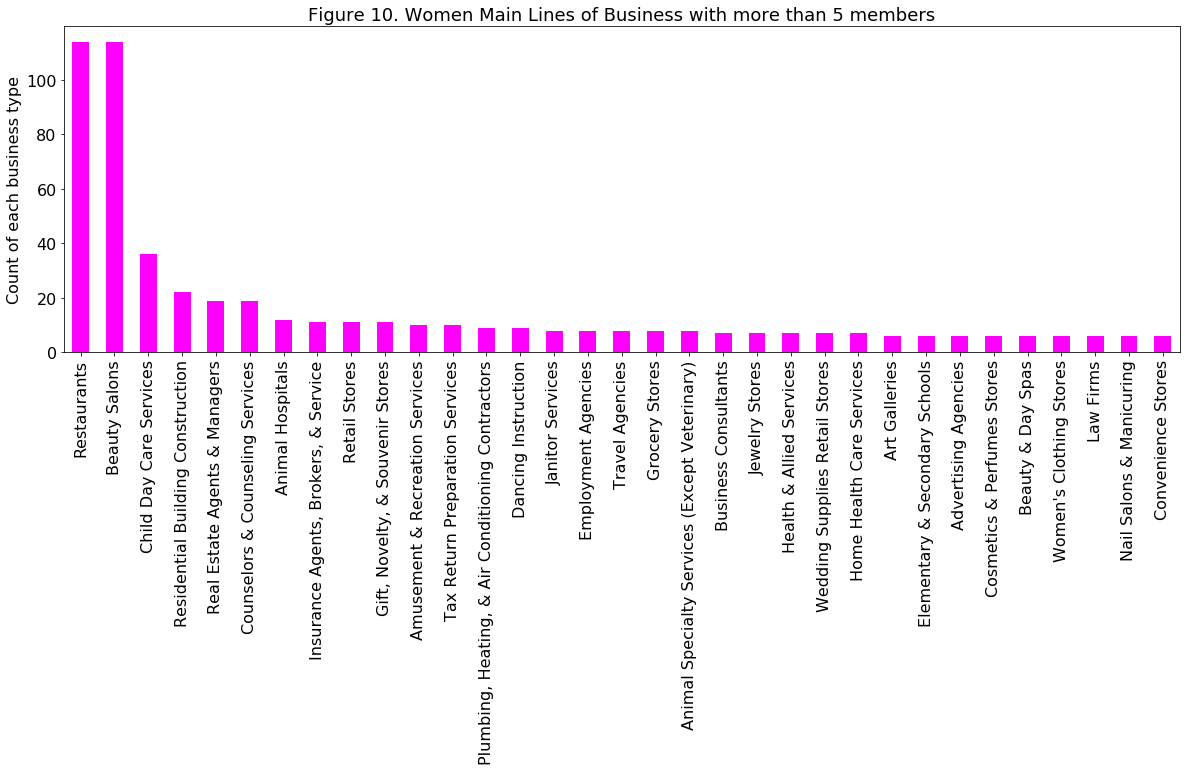

In [28]:
wmbiz_gt_5 = counts[counts["Main Line of Business"] > 5]
# comp_gt_150.head(10)
plt.figure(figsize=(20,10))

plt.title('Figure 10. Women Main Lines of Business with more than 5 members', fontsize=18)
x_axis = women_biz.index
#plt.xlabel(x_axis, fontsize=8)
plt.ylabel('Count of each business type', fontsize=16)
plt.grid()
# Set x axis and tick locations

wmbiz_gt_5["Main Line of Business"].plot(kind="bar", figsize=(20,6), fontsize = 16, color = "magenta")
plt.savefig("./Resources/PNGs_of_Figures/Women_distro.png")
plt.show()

In [29]:
men_biz = business_data[business_data["Women Owned"] == "No"]
#men_biz.head()
print(len(men_biz))

22688


In [30]:
counts = pd.DataFrame(men_biz["Main Line of Business"].value_counts()).rename({"Nonclassified Establishments": "Consulting & LLCs"})

counts.head()

,Main Line of Business
Restaurants,1737
Consulting & LLCs,881
Residential Building Construction,607
Physicians & Surgeons,604
Churches,559


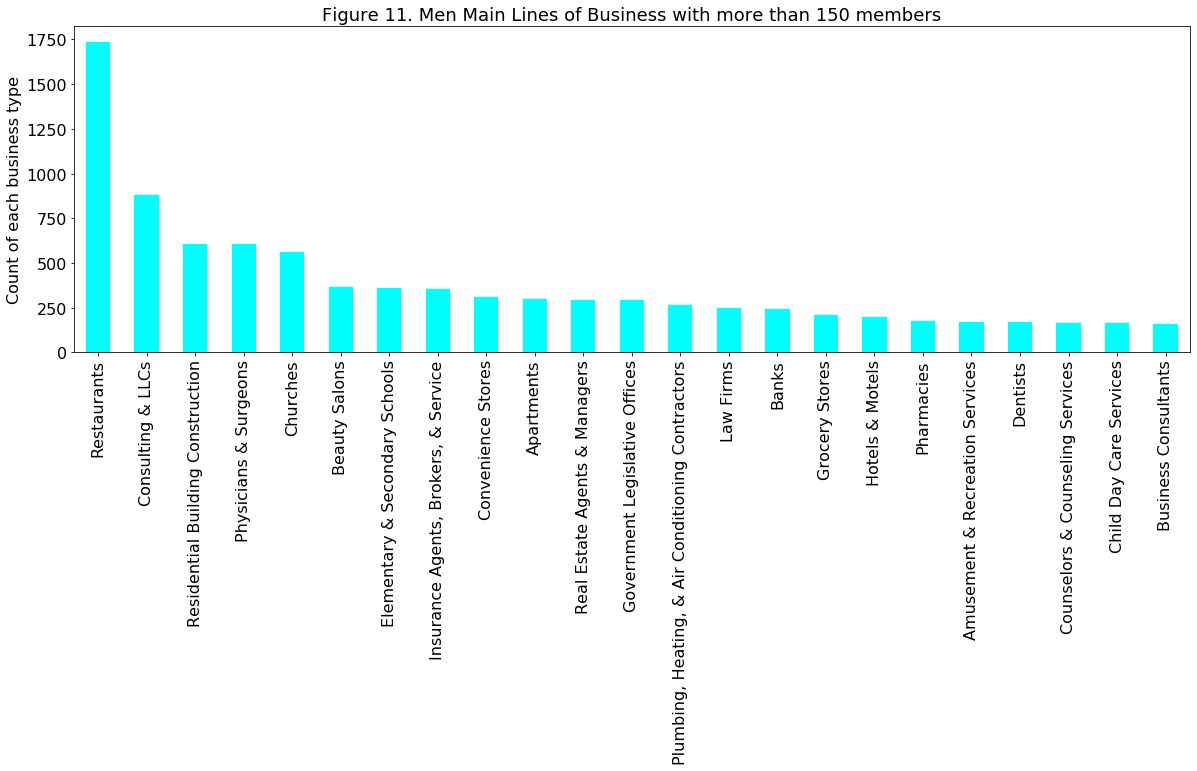

In [31]:
menbiz_gt_5 = counts[counts["Main Line of Business"] > 150]
# comp_gt_150.head(10)
plt.figure(figsize=(20,10))

plt.title('Figure 11. Men Main Lines of Business with more than 150 members', fontsize=18)
x_axis = men_biz.index
#plt.xlabel(x_axis, fontsize=8)
plt.ylabel('Count of each business type', fontsize=16)
plt.grid()
# Set x axis and tick locations

menbiz_gt_5["Main Line of Business"].plot(kind="bar", figsize=(20,6), fontsize = 16, color = "cyan")
plt.savefig("./Resources/PNGs_of_Figures/Men_distro.png")
plt.show()

In [35]:
bizrev_df = business_data_df.groupby(["Main Line of Business","2017 Revenue/Yr"])
bizrev_df.head(10)

,Index,In GRP,Locality,Business Name,GRP Cluster,Main Line of Business,Physical Address,Physical Address Number,Physical Pre Direction,Physical Address Name,...,Est. Accounting Annual Expense,Est. Advertising Annual Expense,Est. Business Insurance Annual Expense,Est. Legal Annual Expense,Est. Office Equipment Annual Expense,Est. Rent Annual Expense,Est. Technology Annual Expense,Est. Telecom Annual Expense,Est. Utilities Annual Expense,BusinessID
0,1.0,Not,Caroline,M.C.Dean Inc-Prefabrication Facility,NaN,Electric Companies,22433 Bills Way,22433,NaN,Bills,...,"$100,000 or more","$5,000 to $14,999","$100,000 or more","$100,000 or more","$25,000 to $99,999","$100,000 or more","$100,000 or more","$25,000 to $99,999","$100,000 or more",1.114001e+13
1,2.0,Not,Caroline,Nuambition LLC,NaN,Catalog & Mail-Order Houses,18414 Congressional Cir,18414,NaN,Congressio,...,"$25,000 to $99,999","$100,000 or more","$100,000 or more","$100,000 or more","$25,000 to $99,999","$100,000 or more","$100,000 or more","$25,000 to $99,999","$100,000 or more",1.114001e+13
2,3.0,Not,Caroline,McKesson,Supply Chain Management,Pharmaceutical Products Wholesale,10504 Mckesson Dr,10504,NaN,McKesson,...,"$100,000 or more","$25,000 to $99,999","$100,000 or more","$100,000 or more","$100,000 or more","$100,000 or more","$100,000 or more","$100,000 or more","$100,000 or more",1.113256e+13
3,4.0,Not,Caroline,Pilot Flying J,NaN,Truck Stops & Plazas,24279 Rogers Clark Blvd,24279,NaN,Rogers Cla,...,"$25,000 to $99,999","$25,000 to $99,999","$50,000 to $99,999","$25,000 to $99,999","$25,000 to $99,999","$100,000 or more","$100,000 or more","$10,000 to $24,999","$100,000 or more",1.113255e+13
4,5.0,Not,Caroline,Atlas Pallet Division,Supply Chain Management,Pallets & Skids Wholesale,29155 Richmond Tpke,29155,NaN,Richmond,...,"$25,000 to $99,999","$5,000 to $14,999","$50,000 to $99,999","$25,000 to $99,999","$25,000 to $99,999","$25,000 to $99,999","$25,000 to $99,999","$25,000 to $99,999","$50,000 to $99,999",1.113255e+13
5,6.0,Not,Caroline,Knollcrest Holdings LLC,Corporate Services,Non-Bank Holding Companies,69 Celts West Cv,69,NaN,Celts West,...,"$5,000 to $24,999","$25,000 to $99,999","$20,000 to $49,999","$25,000 to $99,999","$10,000 to $24,999","$25,000 to $99,999","$10,000 to $24,999","$10,000 to $24,999","$20,000 to $49,999",1.113255e+13
6,7.0,Not,Caroline,Regal Holdings LLC,Corporate Services,Non-Bank Holding Companies,7404 Commerce Way Ste E,7404,NaN,Commerce,...,"$5,000 to $24,999","$25,000 to $99,999","$20,000 to $49,999","$25,000 to $99,999","$10,000 to $24,999","$25,000 to $99,999","$10,000 to $24,999","$10,000 to $24,999","$20,000 to $49,999",1.114001e+13
7,8.0,Not,Caroline,Love's Travel Stop,NaN,Truck Stops & Plazas,23845 Rogers Clark Blvd,23845,NaN,Rogers Cla,...,"$5,000 to $24,999","$25,000 to $99,999","$7,500 to $19,999","$15,000 to $24,999","$10,000 to $24,999","$25,000 to $99,999","$25,000 to $99,999","$5,000 to $9,999","$20,000 to $49,999",1.114001e+13
8,9.0,Not,Caroline,American Stone Inc,NaN,Concrete Products Mfg,8179 Arba Ave,8179,NaN,Arba,...,"$100,000 or more","$5,000 to $14,999","$100,000 or more","$100,000 or more","$25,000 to $99,999","$100,000 or more","$100,000 or more","$25,000 to $99,999","$100,000 or more",1.113254e+13
9,10.0,Not,Caroline,Mr Fuel,NaN,Truck Stops & Plazas,23818 Rogers Clark Blvd,23818,NaN,Rogers Cla,...,"$5,000 to $24,999","$15,000 to $24,999","$7,500 to $19,999","$15,000 to $24,999","$5,000 to $9,999","$25,000 to $99,999","$25,000 to $99,999","$2,000 to $4,999","$20,000 to $49,999",1.113254e+13


In [37]:
bizrev_2017 = pd.DataFrame(bizrev["2017 Revenue/Yr"]).sum().dropna()
bizrev_2017.head()

0    (Accident & Health Insurance Carriers, 7588718...
1    0       NaN
1       NaN
2       NaN
3       Na...
dtype: object